<a href="https://colab.research.google.com/github/Ohjinseo2022/Showmeeverything/blob/master/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%2B_%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98_%2B%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EB%AA%A8%EB%8D%B8%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmex10',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'cmsy10',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmr10',
 'cmtt10',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'cmmi10',
 'STIXSizeTwoSym',
 'DejaVu Serif Display',
 'cmb10',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmss10',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquare',
 'Humor Sans',
 'NanumGothic',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'NanumSquareRound',
 'Liberation Sans',
 'NanumSquare',
 'Liberation Mono',
 'NanumSquareRound',
 'Liberation Serif',
 'Liberation Mono',
 'NanumGothic',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Libe

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,562 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 전처리 데이터 확인

In [3]:
forder = '/content/drive/MyDrive/시각화프로젝트/상관계수분석/'
files = os.listdir('/content/drive/MyDrive/시각화프로젝트/상관계수분석')
files

['2012년.csv',
 '2013년.csv',
 '2014년.csv',
 '2015년.csv',
 '2016년.csv',
 '2017년.csv',
 '2018년.csv',
 '2019년.csv',
 '2020년.csv']

# 전처리 데이터 통합및 평단가 기준 정렬

In [4]:
all_df = pd.read_csv(forder+files[0],encoding='cp949')
for i in range(1,len(files)):
  temp = pd.read_csv(forder+files[i],encoding='cp949')
  all_df = pd.concat([all_df,temp],axis=0)
all_df = all_df.sort_values(['평단가'])

In [9]:
apt2012 = pd.read_csv(forder+files[0],encoding='cp949')
apt2013 = pd.read_csv(forder+files[1],encoding='cp949')
apt2014 = pd.read_csv(forder+files[2],encoding='cp949')
apt2015 = pd.read_csv(forder+files[3],encoding='cp949')
apt2016 = pd.read_csv(forder+files[4],encoding='cp949')
apt2017 = pd.read_csv(forder+files[5],encoding='cp949')
apt2018 = pd.read_csv(forder+files[6],encoding='cp949')
apt2019 = pd.read_csv(forder+files[7],encoding='cp949')
apt2020 = pd.read_csv(forder+files[8],encoding='cp949')

In [5]:
all_df

,행정구,전용면적,층수,아파트연식,병원수,사업체수,지하철수,학군점수,브랜드지수,자동차등록수,학생1만명당학원수,유통업체수,문화생활비,1인가구비율,"1,2인가구비율",3인이상가구비율,지역종사자수,노령화지수,버스정류장수,평단가
0,영등포구,192.730,11,37,681,42157.0,11,0.01,50.0,136630,175,13,77851,0.2137,0.6461,0.3539,434698,155.4,488,565.558
1,강서구,58.140,9,17,664,31596.0,9,0.08,50.0,185718,134,12,115965,0.2885,0.6200,0.3800,280238,145.5,613,378.397
2,구로구,84.320,6,2,513,35523.0,7,0.01,50.0,132134,111,25,101096,0.2715,0.5880,0.4120,239168,155.0,503,448.885
3,구로구,84.940,2,13,513,35523.0,7,0.01,50.0,132134,111,25,101096,0.2715,0.5880,0.4120,239168,155.0,503,288.439
4,영등포구,84.920,7,9,681,42157.0,11,0.01,359.0,136630,175,13,77851,0.2137,0.6461,0.3539,434698,155.4,488,677.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84288,노원구,59.854,4,15,734,37442.0,13,0.10,50.0,143093,117,14,67876,0.6348,0.5458,0.4542,127454,148.4,531,977.378
84289,노원구,134.640,19,22,734,37442.0,13,0.10,50.0,143093,117,14,67876,0.6348,0.5458,0.4542,127454,148.4,531,553.327
84290,노원구,59.920,12,4,734,37442.0,13,0.10,50.0,143093,117,14,67876,0.6348,0.5458,0.4542,127454,148.4,531,1360.147
84291,성북구,84.870,15,3,540,34420.0,9,0.01,75.0,114489,115,21,150247,0.2162,0.5967,0.4033,121798,158.4,620,1396.253


In [6]:
all_df = all_df.sort_values(['평단가'])

# 데이터 일정 범위로 정규화 처리 

In [15]:
all_df.head()

,행정구,전용면적,층수,아파트연식,병원수,사업체수,지하철수,학군점수,브랜드지수,자동차등록수,학생1만명당학원수,유통업체수,문화생활비,평단가
56265,성동구,84.96,9,0,394,26130.0,14,0.01,50.0,93992,141,12,79516,8.239
5758,마포구,170.28,7,12,667,35070.0,16,0.01,50.0,112049,247,17,85633,11.745
18419,영등포구,68.88,10,20,724,43678.0,11,0.01,50.0,136630,175,27,77851,15.970
19982,성북구,87.83,2,33,541,25104.0,9,0.01,50.0,114489,115,11,150247,25.766
42507,은평구,164.33,4,17,581,23953.0,13,0.01,50.0,124829,119,9,81534,30.427


In [17]:
all_df.iloc[0:80,1:].mean()

전용면적             74.062938
층수                4.675000
아파트연식            22.875000
병원수             588.850000
사업체수          30189.037500
지하철수              8.862500
학군점수              0.026875
브랜드지수            50.000000
자동차등록수       110921.025000
학생1만명당학원수       136.050000
유통업체수            15.950000
문화생활비         92835.500000
평단가             129.714650
dtype: float64

In [8]:
all_df_result = pd.DataFrame({})
for i in tqdm(range(len(all_df)//80)):
  if i == 0 :
    all_df_result= pd.concat([all_df_result,all_df.iloc[0:(i+1)*80,1:].mean()],axis=1)
  else:
    all_df_result= pd.concat([all_df_result,all_df.iloc[i*80:(i+1)*80,1:].mean()],axis=1)
all_df_result= pd.concat([all_df_result,all_df.iloc[len(all_df)-len(all_df)%80:,1:].mean()],axis=1)
all_df_result = all_df_result.transpose()
## 인덱스번호 재설정
all_df_result = all_df_result.reset_index(drop=True)
all_df_result.to_csv('/content/drive/MyDrive/시각화프로젝트/2012~2020상관관계 통합 파일.csv',encoding='cp949',index=None)

100%|██████████| 9645/9645 [18:28<00:00,  8.70it/s]


In [11]:
all_df_result

,전용면적,층수,아파트연식,병원수,사업체수,지하철수,학군점수,브랜드지수,자동차등록수,학생1만명당학원수,유통업체수,문화생활비,1인가구비율,"1,2인가구비율",3인이상가구비율,지역종사자수,노령화지수,버스정류장수,평단가
0,74.062938,4.675000,22.875000,588.850000,30189.037500,8.8625,0.026875,50.0000,110921.0250,136.0500,15.9500,92835.5000,0.221006,0.611576,0.388424,201411.1500,176.50750,455.8875,129.714650
1,71.445875,3.950000,25.925000,506.637500,26250.975000,6.7250,0.019563,50.0000,110101.4750,123.8375,14.4625,96889.9250,0.224045,0.610304,0.389696,154770.7000,174.91625,476.1750,183.747762
2,70.247625,3.725000,27.825000,530.475000,29517.000000,8.2250,0.019250,50.0000,115603.4625,123.6000,15.9125,104731.7000,0.225615,0.611684,0.388316,180489.4250,170.41500,500.2000,199.298663
3,75.122875,3.200000,23.387500,558.300000,29489.875000,8.8500,0.026250,50.0000,126046.1500,131.6375,15.5125,96991.7500,0.249255,0.590321,0.409679,178688.0125,157.35250,493.1125,207.807712
4,73.812375,3.787500,25.825000,560.050000,28944.750000,7.8125,0.028875,50.3250,119779.1625,133.9625,15.8625,92919.9375,0.233108,0.606712,0.393288,175638.4000,167.35000,478.5500,213.070600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,62.080125,11.050000,18.425000,1773.962500,73718.575000,16.8750,0.162000,122.6875,186762.7750,304.0125,27.9250,119505.5875,0.278112,0.558696,0.441304,613493.3500,113.48375,572.0250,3748.176600
9642,49.925967,9.287500,24.312500,1968.262500,71321.087500,18.3625,0.175187,89.2500,195115.4125,322.2125,28.4375,121393.8000,0.281529,0.564066,0.435934,659407.7125,114.23000,560.5125,3897.785213
9643,52.494054,6.925000,26.037500,2090.287500,71288.900000,18.5250,0.185312,66.0750,197281.0875,336.8000,29.6500,124692.4625,0.284701,0.566034,0.433966,694199.3125,114.52375,560.3250,4110.258088
9644,47.810875,3.575000,35.650000,2592.275000,76387.362500,20.6625,0.226250,50.0000,215079.1375,391.9750,31.8250,133986.6125,0.296955,0.575445,0.424555,825667.2000,113.27000,560.6625,4551.418462


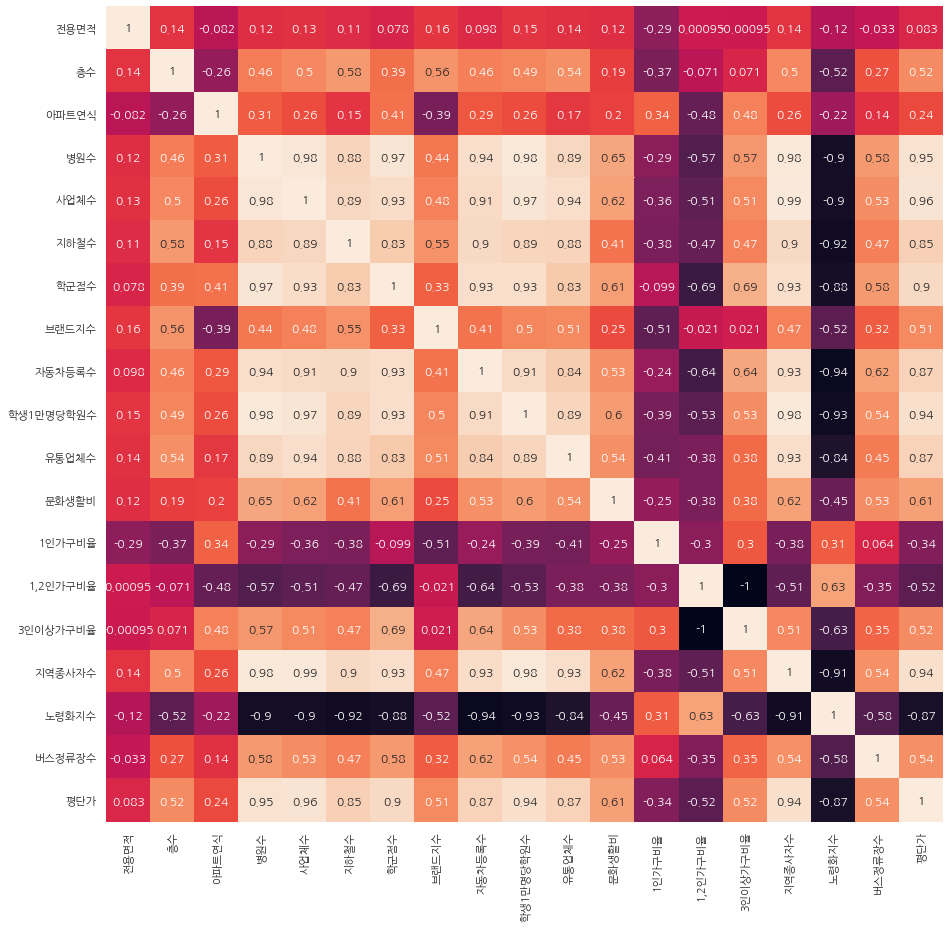

In [12]:
df_corr= all_df_result.corr()
plt.rcParams['font.family'] = 'NanumGothic'
#히트맵 
sns.set(font="NanumGothic",
        style='darkgrid',
        font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [13]:
corr_order= all_df_result.corr().loc[:'버스정류장수','평단가'].abs().sort_values(ascending=False) ## abs() 함수를 사용하여 상관계수의 값을 모두 양수로 변경 
# sort_values() ascending =False 옵션을 적용하여 상관계수 값을 기ㄴ준으로 내림차순 정렬 처리하였다 
corr_order

사업체수         0.958106
병원수          0.949027
학생1만명당학원수    0.942608
지역종사자수       0.940848
학군점수         0.903795
노령화지수        0.874073
자동차등록수       0.873255
유통업체수        0.870361
지하철수         0.854155
문화생활비        0.613201
버스정류장수       0.537466
3인이상가구비율     0.522691
1,2인가구비율     0.522691
층수           0.517041
브랜드지수        0.512915
1인가구비율       0.338174
아파트연식        0.239182
전용면적         0.082645
Name: 평단가, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled= all_df_result.iloc[:,1:-1] # 마지막열임을 나타내는 -1은 포함하지 않음 -> 평단가 데이터를 제외한 데이터의 영향력차이를 줄여주기위함 
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

# 스케일린된 변환된 값을 데이터 프레임에 반영 
all_df_result.iloc[:,1:-1] = df_scaled[:,:]
all_df_result = all_df_result.sort_values(by='평단가' ,ascending=True)
all_df_result

,전용면적,층수,아파트연식,병원수,사업체수,지하철수,학군점수,브랜드지수,자동차등록수,학생1만명당학원수,유통업체수,문화생활비,1인가구비율,"1,2인가구비율",3인이상가구비율,지역종사자수,노령화지수,버스정류장수,평단가
0,74.062938,0.136179,0.632488,0.075065,0.137874,0.207491,0.076705,0.000000,0.188064,0.092348,0.200810,0.302087,0.122880,0.653690,0.346310,0.124651,0.802001,0.506783,129.714650
1,71.445875,0.077236,0.716820,0.038133,0.073237,0.105826,0.043466,0.000000,0.181804,0.049870,0.152632,0.369684,0.130882,0.641366,0.358634,0.060562,0.783514,0.573302,183.747762
2,70.247625,0.058943,0.769355,0.048841,0.126844,0.177170,0.042045,0.000000,0.223827,0.049043,0.199595,0.500425,0.135017,0.654731,0.345269,0.095902,0.731219,0.652076,199.298663
3,75.122875,0.016260,0.646659,0.061341,0.126399,0.206897,0.073864,0.000000,0.303585,0.077000,0.186640,0.371381,0.197270,0.447850,0.552150,0.093427,0.579459,0.628837,207.807712
4,73.812375,0.064024,0.714055,0.062127,0.117451,0.157551,0.085795,0.001638,0.255720,0.085087,0.197976,0.303495,0.154747,0.606588,0.393412,0.089237,0.695610,0.581089,213.070600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,62.080125,0.654472,0.509447,0.607440,0.852338,0.588585,0.690909,0.366368,0.767321,0.676565,0.588664,0.746740,0.273263,0.141584,0.858416,0.690893,0.069795,0.887577,3748.176600
9642,49.925967,0.511179,0.672235,0.694724,0.812987,0.659334,0.750852,0.197833,0.831116,0.739870,0.605263,0.778221,0.282259,0.193589,0.806411,0.753984,0.078465,0.849830,3897.785213
9643,52.494054,0.319106,0.719931,0.749540,0.812459,0.667063,0.796875,0.081023,0.847657,0.790609,0.644534,0.833217,0.290613,0.212643,0.787357,0.801791,0.081877,0.849215,4110.258088
9644,47.810875,0.046748,0.985714,0.975042,0.896142,0.768728,0.982955,0.000000,0.983593,0.982522,0.714980,0.988173,0.322882,0.303784,0.696216,0.982441,0.067311,0.850322,4551.418462


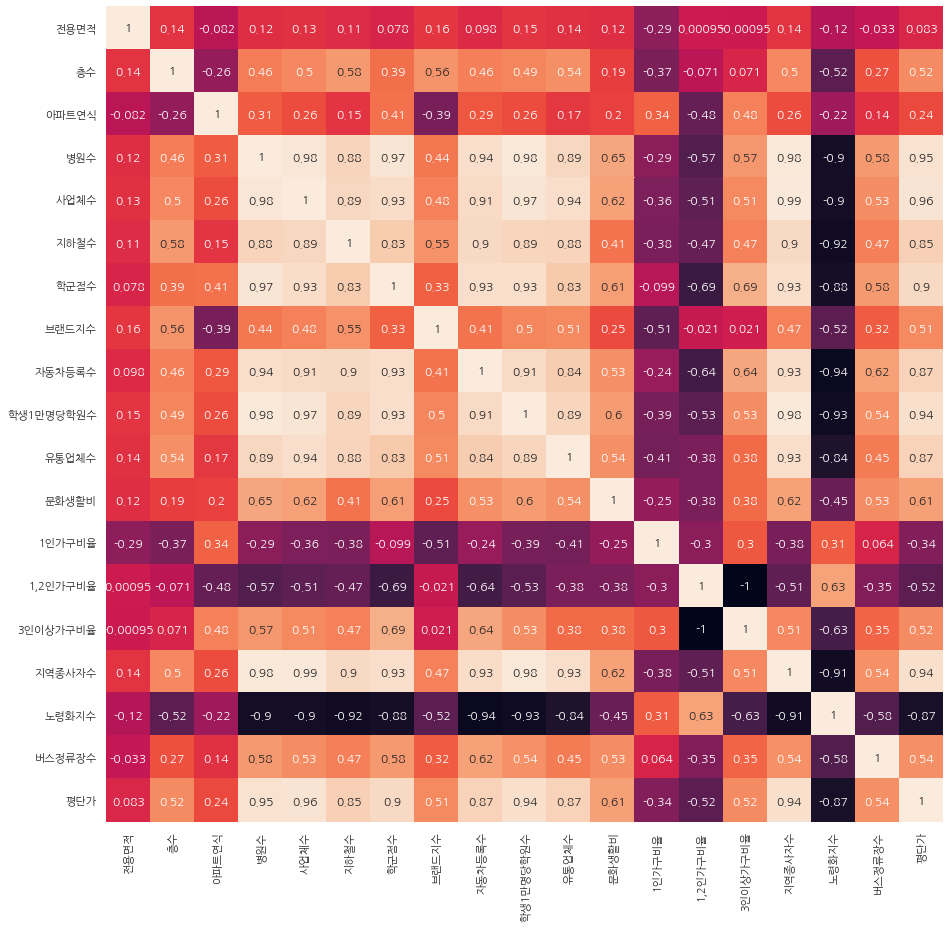

In [14]:
df_corr= all_df_result.corr()
plt.rcParams['font.family'] = 'NanumGothic'
#히트맵 
sns.set(font="NanumGothic",
        style='darkgrid',
        font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [15]:
corr_order= all_df_result.corr().loc[:'버스정류장수','평단가'].abs().sort_values(ascending=False) ## abs() 함수를 사용하여 상관계수의 값을 모두 양수로 변경 
# sort_values() ascending =False 옵션을 적용하여 상관계수 값을 기ㄴ준으로 내림차순 정렬 처리하였다 
corr_order

사업체수         0.958106
병원수          0.949027
학생1만명당학원수    0.942608
지역종사자수       0.940848
학군점수         0.903795
노령화지수        0.874073
자동차등록수       0.873255
유통업체수        0.870361
지하철수         0.854155
문화생활비        0.613201
버스정류장수       0.537466
1,2인가구비율     0.522691
3인이상가구비율     0.522691
층수           0.517041
브랜드지수        0.512915
1인가구비율       0.338174
아파트연식        0.239182
전용면적         0.082645
Name: 평단가, dtype: float64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


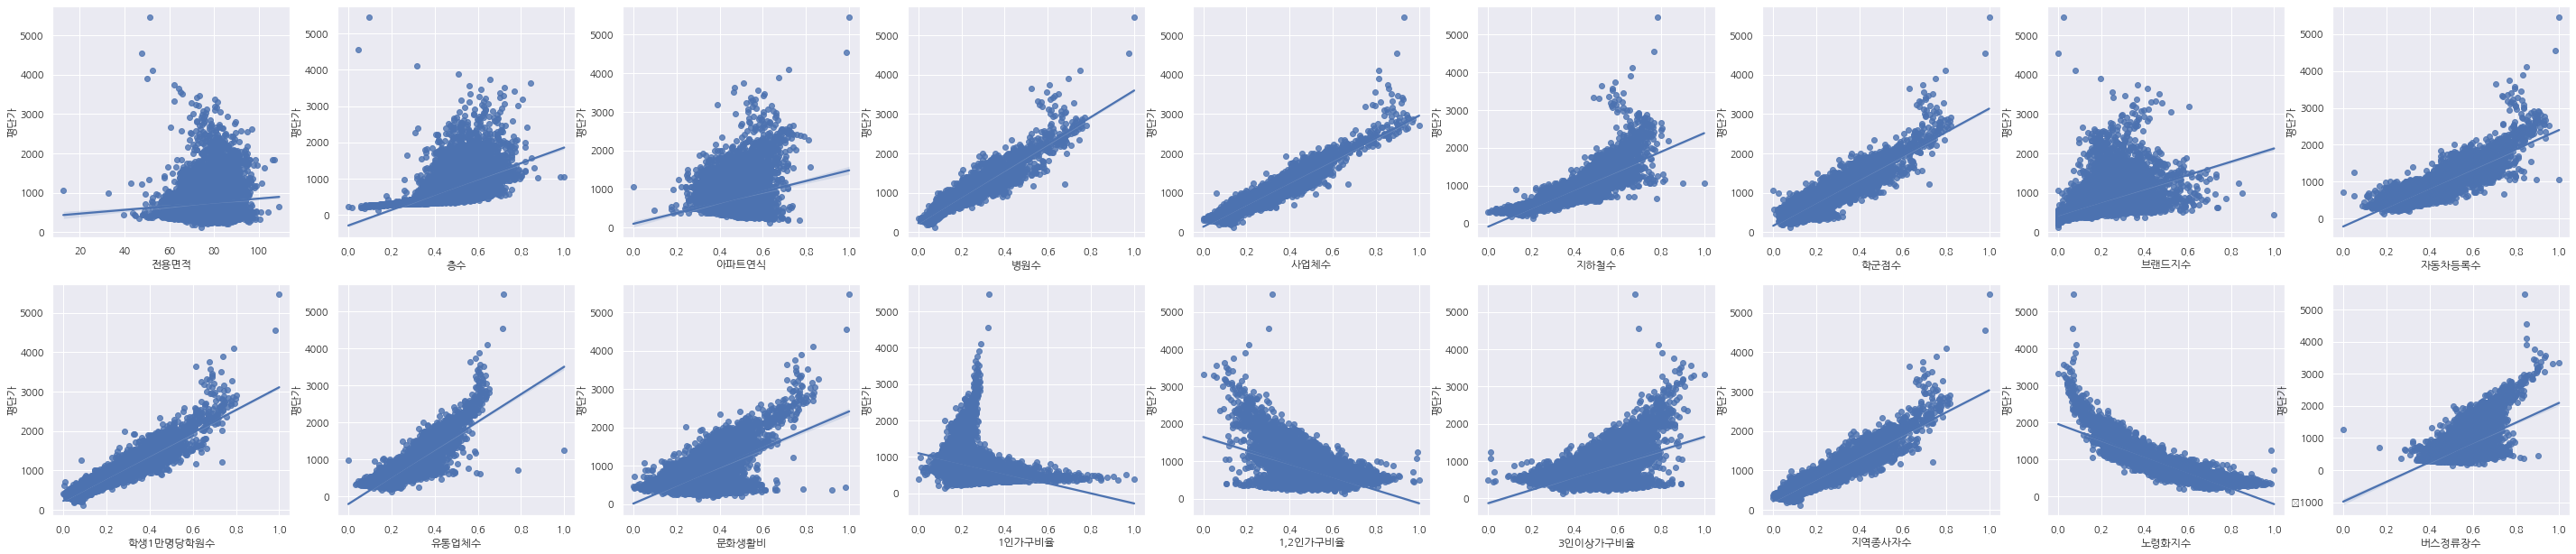

In [29]:
plot_cols  = ['평단가','전용면적','층수','아파트연식','병원수','사업체수','지하철수','학군점수','브랜드지수',
'자동차등록수','학생1만명당학원수','유통업체수','문화생활비',
'1인가구비율',"1,2인가구비율","3인이상가구비율","지역종사자수","노령화지수","버스정류장수"]
plot_df = all_df_result.loc[:,plot_cols]

plt.figure(figsize= (50,50))
for idx , col in enumerate(plot_cols[1:]):
  ax1=plt.subplot(9,9,idx+1)
  sns.regplot(x=col,y=plot_cols[0],data=plot_df,ax=ax1)
plt.show()

## 랜덤 포레스트 ! ? 외주 코드 



In [20]:
from sklearn.model_selection import train_test_split ## 학습데이터와 테스트 데이터를 구분하기위한 라이브러리 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [21]:
### 학습데이터와 테스트 데이터 분리
x_col = ['전용면적','층수','아파트연식','병원수','사업체수','지하철수','학군점수','브랜드지수',
         '자동차등록수','학생1만명당학원수','유통업체수','문화생활비','1인가구비율',
         "1,2인가구비율","3인이상가구비율","지역종사자수","노령화지수","버스정류장수"]
x_df = all_df_result[x_col]
y_df = all_df_result['평단가']

x_train, x_test, y_train, y_test = train_test_split(x_df,y_df,test_size= 0.3)


In [42]:

## 랜덤포레스트 모델 
model_rf = RandomForestRegressor(random_state= 123)
model_rf.fit(x_train,y_train.ravel())
y_rf_pred = model_rf.predict(x_test)


print('RanDomForest  : '+str(mean_absolute_error(y_test,y_rf_pred)))



RanDomForest  : 51.7986153305978


In [43]:
###Linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

y_lr_pred = model_lr.predict(x_test)


y_train_pred=model_lr.predict(x_train)

train_mae=mean_absolute_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
print("Train MAE:%.4f" % train_mae)

test_mae=mean_absolute_error(y_test, y_lr_pred)
print("Test MAE:%.4f" % test_mae)ㄴ

Train MAE:59.7364
Test MAE:60.5517


In [44]:
train_mae=mean_squared_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
print("Train MSE:%.4f" % train_mae)

test_mae=mean_squared_error(y_test, y_lr_pred)
print("Test MSE:%.4f" % test_mae)

Train MSE:9159.4827
Test MSE:9014.3158


In [45]:
train_mae=mean_squared_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
print("Train RMSE:%.4f" % np.sqrt(train_mae))

test_mae=mean_squared_error(y_test, y_lr_pred)
print("Test RMSE:%.4f" % np.sqrt(test_mae))

Train RMSE:95.7052
Test RMSE:94.9438


In [16]:
# ## 정확도 높은모델 저장! 
import joblib
# joblib.dump(model_lr,'/content/drive/MyDrive/머신러닝모델저장소/all_apt_model.pkl')

In [17]:
#file -> model load
model_joblib_lr = joblib.load('/content/drive/MyDrive/머신러닝모델저장소/all_apt_model.pkl')

In [22]:
### 결정계수 !!! 
model_joblib_lr.score(x_train,y_train)

0.9446238200295993

In [27]:
apt2012 = apt2012.sort_values(['평단가'])

In [28]:
apt2012_result = pd.DataFrame({})
for i in tqdm(range(len(apt2012)//80)):
  if i == 0 :
    apt2012_result= pd.concat([apt2012_result,apt2012.iloc[0:(i+1)*80,1:].mean()],axis=1)
  else:
    apt2012_result= pd.concat([apt2012_result,apt2012.iloc[i*80:(i+1)*80,1:].mean()],axis=1)
apt2012_result= pd.concat([apt2012_result,apt2012.iloc[len(apt2012)-len(apt2012)%80:,1:].mean()],axis=1)
apt2012_result = apt2012_result.transpose()
## 인덱스번호 재설정
apt2012_result = apt2012_result.reset_index(drop=True)
apt2012_result

100%|██████████| 513/513 [00:03<00:00, 161.18it/s]


,전용면적,층수,아파트연식,병원수,사업체수,지하철수,학군점수,브랜드지수,자동차등록수,학생1만명당학원수,유통업체수,문화생활비,1인가구비율,"1,2인가구비율",3인이상가구비율,지역종사자수,노령화지수,버스정류장수,평단가
0,76.213125,3.900000,19.650000,586.287500,30091.200000,9.250000,0.033125,50.000000,114754.450000,144.550000,12.762500,93189.500000,0.235030,0.611390,0.388610,217363.4000,168.938750,464.512500,192.347813
1,80.251737,4.225000,17.662500,557.800000,26451.950000,8.825000,0.034250,50.000000,121110.012500,139.237500,10.575000,94361.325000,0.249425,0.597641,0.402359,178488.8875,166.023750,476.750000,232.509150
2,75.436437,4.675000,14.387500,525.987500,28579.637500,6.750000,0.025875,50.325000,113870.150000,130.675000,13.025000,86212.562500,0.239711,0.605155,0.394845,172642.0625,172.095000,418.162500,249.301763
3,77.907488,4.137500,17.612500,524.662500,29353.312500,7.712500,0.029625,50.000000,122534.550000,128.825000,14.162500,92552.050000,0.249005,0.602505,0.397495,197147.8875,167.070000,454.662500,256.861475
4,81.901875,4.362500,15.137500,490.725000,27266.362500,6.762500,0.031313,50.000000,113075.762500,126.700000,13.362500,89357.450000,0.276593,0.593764,0.406236,171868.1625,170.132500,431.175000,263.027113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,63.625923,7.600000,23.112500,1736.337500,52656.512500,18.300000,0.176625,105.212500,199639.700000,319.762500,23.600000,121439.612500,0.277425,0.555791,0.444209,658411.7500,110.516250,573.025000,1489.013625
510,58.165219,7.725000,23.412500,2069.025000,57793.025000,19.662500,0.204750,88.550000,208489.737500,360.625000,23.312500,128515.262500,0.288415,0.566970,0.433030,753224.6000,112.095000,565.762500,1527.146213
511,58.287788,6.500000,23.187500,2032.387500,57340.712500,20.037500,0.201125,85.012500,209680.562500,353.862500,23.087500,126776.375000,0.285160,0.566464,0.433536,741488.6500,112.313750,560.712500,1567.479275
512,86.178663,13.087500,13.675000,1666.787500,50762.862500,17.700000,0.166125,119.450000,189030.100000,312.112500,22.600000,119501.262500,0.284225,0.563206,0.436794,632570.6500,114.711250,565.025000,1670.284187


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled= apt2012_result.iloc[:,1:-1] # 마지막열임을 나타내는 -1은 포함하지 않음 -> 평단가 데이터를 제외한 데이터의 영향력차이를 줄여주기위함 
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

# 스케일린된 변환된 값을 데이터 프레임에 반영 
apt2012_result.iloc[:,1:-1] = df_scaled[:,:]
apt2012_result = apt2012_result.sort_values(by='평단가' ,ascending=True)
apt2012_result

,전용면적,층수,아파트연식,병원수,사업체수,지하철수,학군점수,브랜드지수,자동차등록수,학생1만명당학원수,유통업체수,문화생활비,1인가구비율,"1,2인가구비율",3인이상가구비율,지역종사자수,노령화지수,버스정류장수,평단가
0,76.213125,0.000000,0.656170,0.082528,0.189590,0.185940,0.084361,0.000000,0.095246,0.121602,0.268971,0.239425,0.144467,0.719293,0.280707,0.137618,0.755887,0.382003,192.347813
1,80.251737,0.019325,0.553985,0.064901,0.083124,0.163601,0.090363,0.000000,0.148058,0.100005,0.121417,0.264655,0.211703,0.549248,0.450752,0.075056,0.718172,0.451698,232.509150
2,75.436437,0.046082,0.385604,0.045217,0.145369,0.054534,0.045682,0.003440,0.087898,0.065196,0.286678,0.089210,0.166332,0.642178,0.357822,0.065647,0.796723,0.118032,249.301763
3,77.907488,0.014122,0.551414,0.044397,0.168003,0.105125,0.065689,0.000000,0.159895,0.057676,0.363406,0.225701,0.209741,0.609403,0.390597,0.105085,0.731709,0.325906,256.861475
4,81.901875,0.027500,0.424165,0.023397,0.106950,0.055191,0.074692,0.000000,0.081297,0.049037,0.309444,0.156920,0.338596,0.501291,0.498709,0.064401,0.771332,0.192141,263.027113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,63.625923,0.220003,0.834190,0.794143,0.849733,0.661629,0.849950,0.584360,0.800603,0.833884,1.000000,0.847659,0.342484,0.031647,0.968353,0.847414,0.000000,1.000000,1489.013625
510,58.165219,0.227436,0.849614,1.000000,1.000000,0.733246,1.000000,0.408007,0.874143,1.000000,0.980607,1.000000,0.393816,0.169906,0.830094,1.000000,0.020426,0.958639,1527.146213
511,58.287788,0.154597,0.838046,0.977330,0.986768,0.752957,0.980660,0.370566,0.884038,0.972509,0.965430,0.962561,0.378613,0.163644,0.836356,0.981113,0.023257,0.929878,1567.479275
512,86.178663,0.546291,0.348972,0.751108,0.794334,0.630092,0.793931,0.735047,0.712442,0.802785,0.932546,0.805926,0.374245,0.123355,0.876645,0.805827,0.054276,0.954439,1670.284187


In [30]:
x_col = ['전용면적','층수','아파트연식','병원수','사업체수','지하철수','학군점수','브랜드지수',
         '자동차등록수','학생1만명당학원수','유통업체수','문화생활비','1인가구비율',
         "1,2인가구비율","3인이상가구비율","지역종사자수","노령화지수","버스정류장수"]
x_2012df = apt2012_result[x_col]
y_2012df = apt2012_result['평단가']

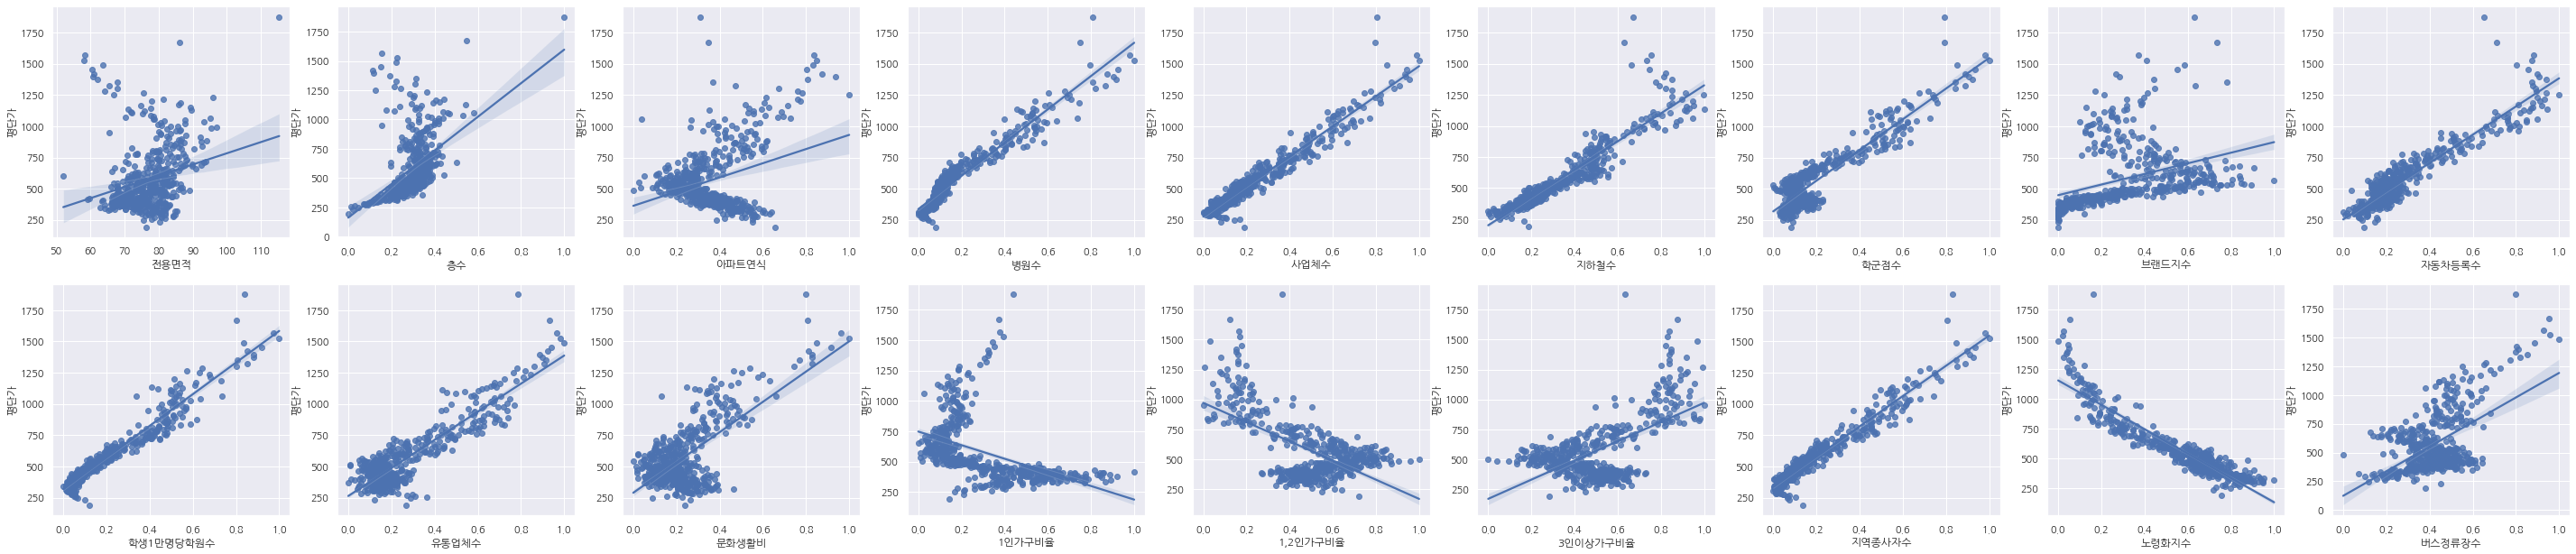

In [32]:
plot_cols  = ['평단가','전용면적','층수','아파트연식','병원수','사업체수','지하철수','학군점수','브랜드지수',
'자동차등록수','학생1만명당학원수','유통업체수','문화생활비',
'1인가구비율',"1,2인가구비율","3인이상가구비율","지역종사자수","노령화지수","버스정류장수"]
plot_df = apt2012_result.loc[:,plot_cols]

plt.figure(figsize= (50,50))
for idx , col in enumerate(plot_cols[1:]):
  ax1=plt.subplot(9,9,idx+1)
  sns.regplot(x=col,y=plot_cols[0],data=plot_df,ax=ax1)
plt.show()